--> Handling the class imbalance using random undersampling

-->Modelling classifiers and evaluating them using metrics - Recall, Precision, Accuracy, F1 score & AUC-ROC

**IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score,auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.under_sampling import RandomUnderSampler

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction/Merged.csv',index_col = 0)

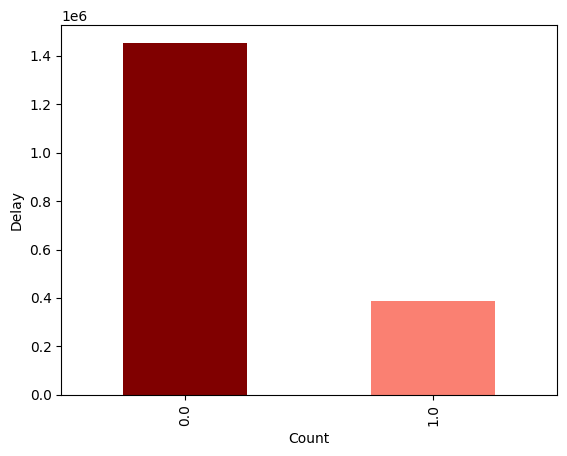

In [ ]:
data['ArrDel15'].value_counts().plot(kind = 'bar', color = ['maroon', 'salmon'])
plt.xlabel("Count")
plt.ylabel("Delay")
plt.show()

In [ ]:
data.drop(columns=["FlightDate",
                 "OriginAirportID",
                 "DestAirportID",
                 "CRSArrTime",
                 "ArrTime",
                 "ArrDelayMinutes",
                 "New_time",
                 "date",
                 "airport_code"
                 ],
        inplace=True)

In [ ]:
labelEncoder = LabelEncoder()
data["Origin"] = labelEncoder.fit_transform(data["Origin"])
data["Dest"] = labelEncoder.fit_transform(data["Dest"])

In [ ]:
X = data.drop('ArrDel15', axis = 1)
y = data['ArrDel15']

**RANDOM UNDERSAMPLING**

In [ ]:
under_sample = RandomUnderSampler(random_state = 42)
X_resampled, y_resampled = under_sample.fit_resample(X, y)

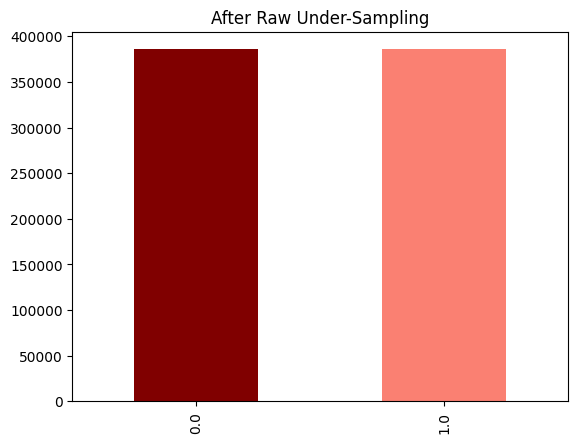

In [ ]:
y_resampled.value_counts().plot(kind = 'bar', color = ['maroon', 'salmon'])
plt.title('After Raw Under-Sampling')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Modelling classifiers and evaluating them**


Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86     77182
         1.0       0.91      0.78      0.84     77106

    accuracy                           0.85    154288
   macro avg       0.86      0.85      0.85    154288
weighted avg       0.86      0.85      0.85    154288



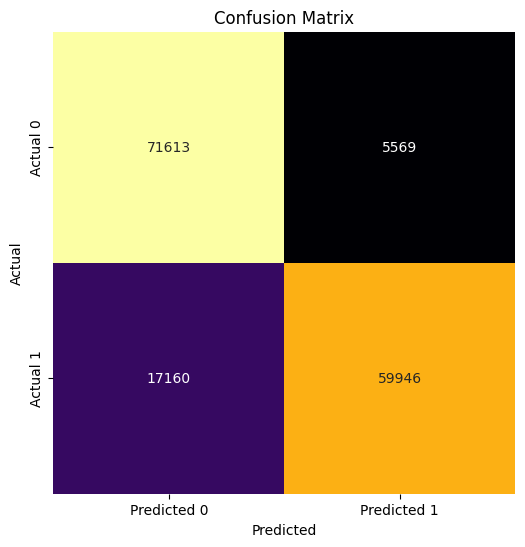


AUC-ROC: 0.9080322760142419


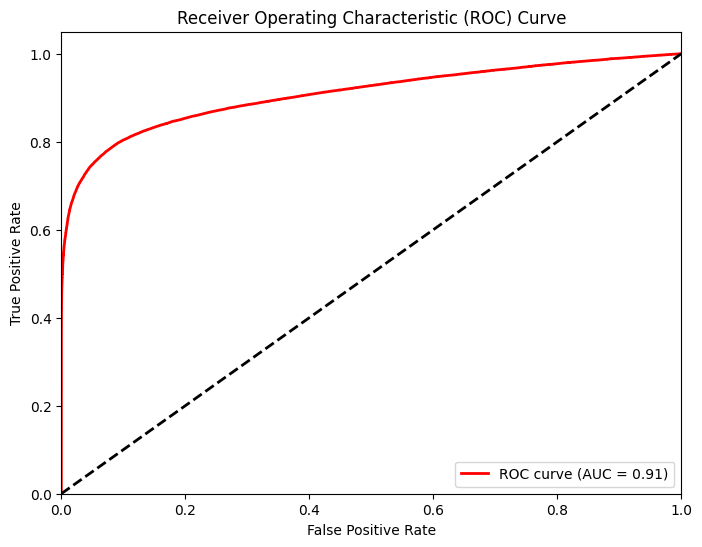

In [ ]:
#logistic classifier
logistic_model = LogisticRegression(max_iter=3000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]

classification_rep = classification_report(y_test, y_pred)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, y_prob)
roc_auc_lg = roc_auc_score(y_test, y_prob)

precision = classification_rep.split()[-8]
recall = classification_rep.split()[-7]
specificity = classification_rep.split()[-6]
f1_score = classification_rep.split()[-5]

print("\nClassification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
custom_cmap = plt.get_cmap('inferno')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAUC-ROC:", roc_auc_lg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lg, tpr_lg, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_lg))
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79     77182
         1.0       0.79      0.80      0.80     77106

    accuracy                           0.80    154288
   macro avg       0.80      0.80      0.80    154288
weighted avg       0.80      0.80      0.80    154288



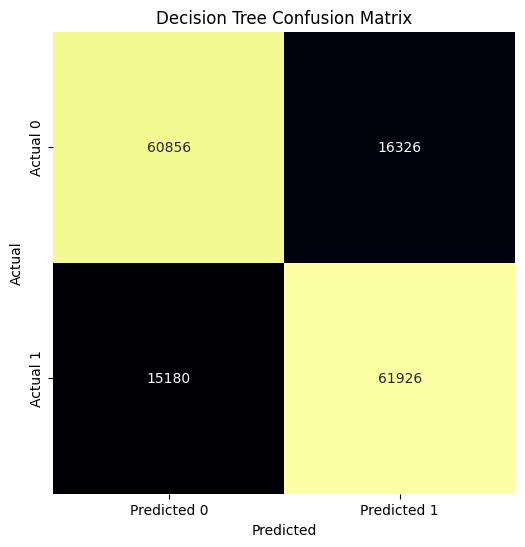


AUC-ROC: 0.7958100295190246


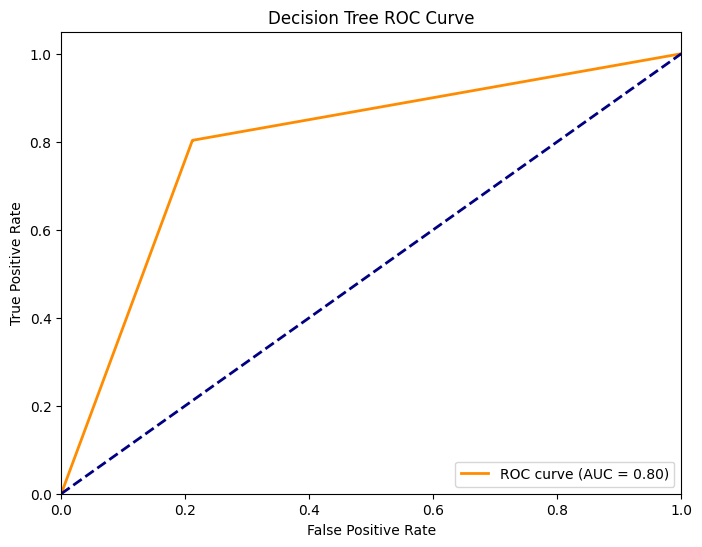

In [ ]:
#Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:, 1]

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

custom_cmap = plt.get_cmap('inferno')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob)
roc_auc_dt = roc_auc_score(y_test, y_prob)
print("\nAUC-ROC:", roc_auc_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()





Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87     77182
         1.0       0.91      0.80      0.85     77106

    accuracy                           0.86    154288
   macro avg       0.87      0.86      0.86    154288
weighted avg       0.87      0.86      0.86    154288



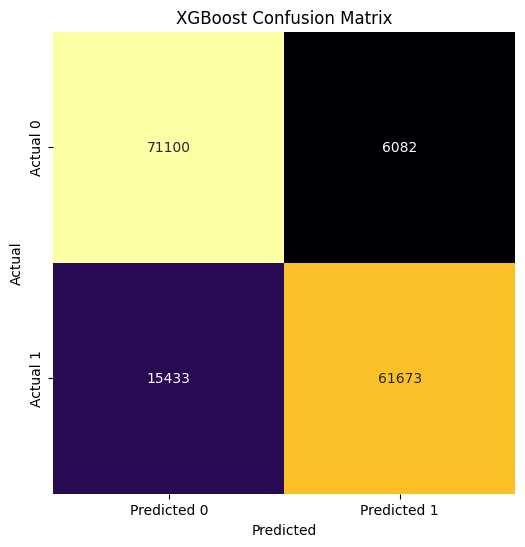


AUC-ROC: 0.9274193039706418


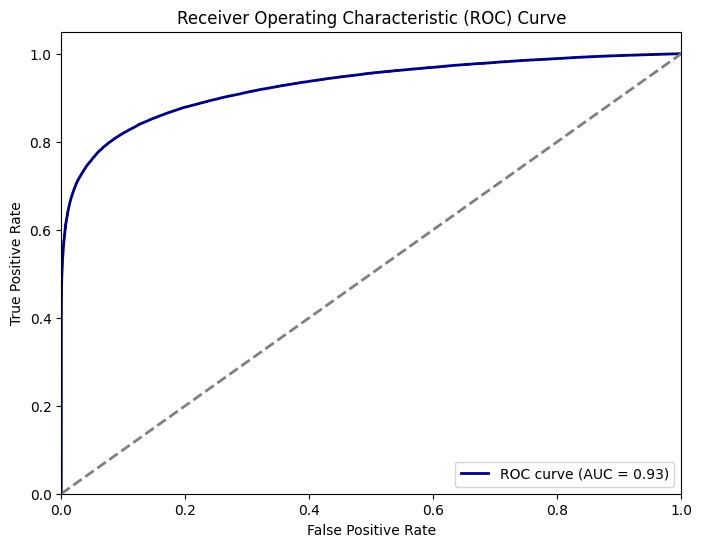

In [ ]:
#xgboost
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

custom_cmap = plt.get_cmap('inferno')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob)
roc_auc_xgb = roc_auc_score(y_test, y_prob)
print("\nAUC-ROC:", roc_auc_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='navy', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87     77182
         1.0       0.90      0.81      0.85     77106

    accuracy                           0.86    154288
   macro avg       0.86      0.86      0.86    154288
weighted avg       0.86      0.86      0.86    154288



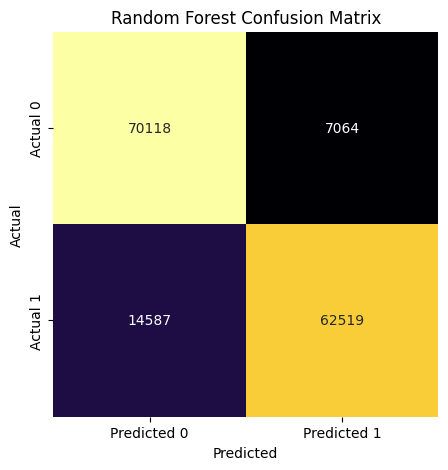


ROC AUC: 0.9270185329686875


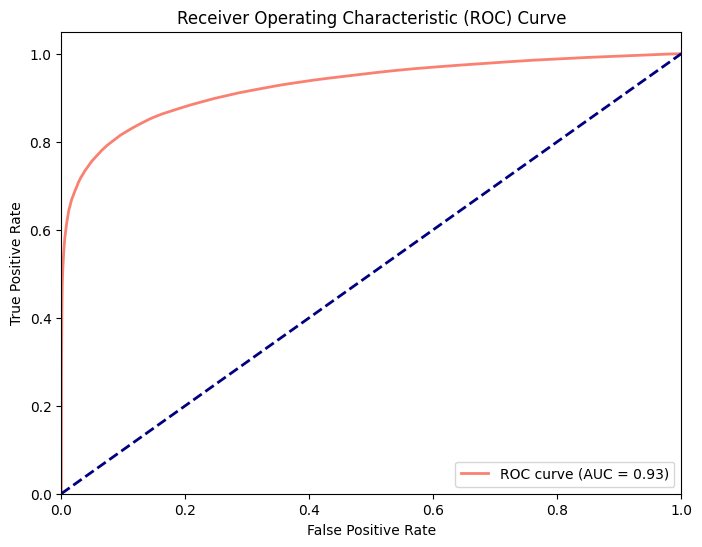

In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf= roc_auc_score(y_test, y_prob_rf)

print("\nClassification Report:")
print(classification_rep_rf)

plt.figure(figsize=(12, 5))
custom_cmap = plt.get_cmap('inferno')
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

print("\nROC AUC:", roc_auc_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='salmon', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86     77182
         1.0       0.88      0.82      0.85     77106

    accuracy                           0.85    154288
   macro avg       0.85      0.85      0.85    154288
weighted avg       0.85      0.85      0.85    154288



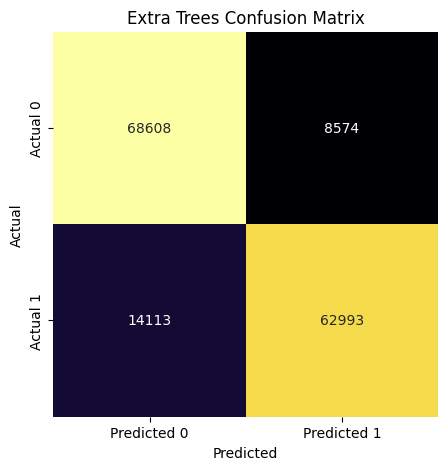


ROC AUC: 0.9198800329001202


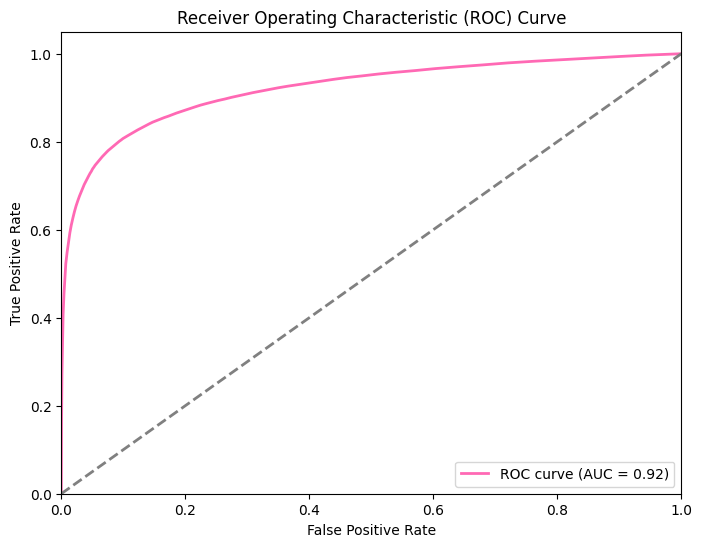

In [ ]:
# Extra Trees Classifier
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train, y_train)
y_pred_et = extra_trees.predict(X_test)
y_prob_et = extra_trees.predict_proba(X_test)[:, 1]

accuracy_et = accuracy_score(y_test, y_pred_et)
classification_rep_et = classification_report(y_test, y_pred_et)
conf_matrix_et = confusion_matrix(y_test, y_pred_et)
fpr_et, tpr_et, thresholds_et = roc_curve(y_test, y_prob_et)
roc_auc_et= roc_auc_score(y_test, y_prob_et)
print("\nClassification Report:")
print(classification_rep_et)

custom_cmap = plt.get_cmap('inferno')
plt.figure(figsize=(12, 5))
sns.heatmap(conf_matrix_et, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Extra Trees Confusion Matrix')
plt.show()

print("\nROC AUC:", roc_auc_et)
plt.figure(figsize=(8, 6))
plt.plot(fpr_et, tpr_et, color='hotpink', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_et))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

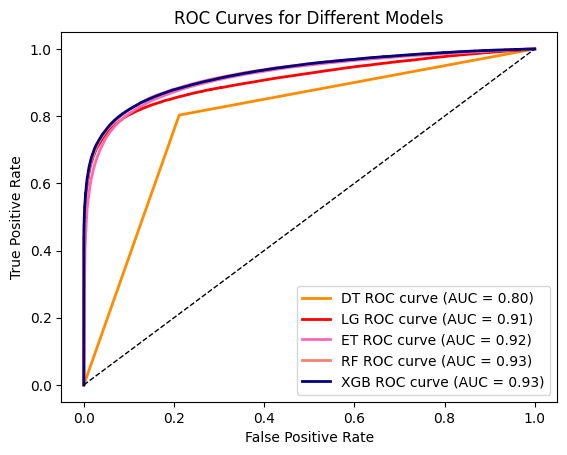

In [ ]:

plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'DT ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lg, tpr_lg, color='red', lw=2, label=f'LG ROC curve (AUC = {roc_auc_lg:.2f})')
plt.plot(fpr_et, tpr_et, color='hotpink', lw=2, label=f'ET ROC curve (AUC = {roc_auc_et:.2f})')
plt.plot(fpr_rf, tpr_rf, color='salmon', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='navy', lw=2, label=f'XGB ROC curve (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")

plt.show()
